# Outline
- **[1- Problem Statement](#1)**
    - [1.1 The Challenge](#1.1)
    - [1.2 Data Content](#1.2)
- **[2- Loading Packages](#2)**

### EDA
- **[3- Univariate Analysis](#3)**
- **[4- Bivariate Analysis](#4)**
- **[5- Conclusion](#44)**

### Machine Learning
- **[6- Data Preprocessing](#5)**
    - [6.1 Quick Pipeline](#5.1)
    - [6.2 Full Pipeline](#5.2)
- **[7- BEAST Model 💡](#6)**
- **[8- Error Analysis](#7)**
- **[9- Voting Classification](#8)**
- **[10- Final Submission](#9)**


---

<a name='1'></a>
# 1- Problem Statement
<a name='1.1'></a>
### 1.1 The Challenge
<font size=4>
    
- The sinking of the Titanic is one of the most infamous shipwrecks in history.

- On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

- While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

- In this challenge, the task is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).</font>

<div style="text-align:center">
  <img src="https://i.imgur.com/AzgG5Tb.jpeg" style="width:1000px; height300px;"/>
</div>


---

<a name='1.2'></a>
# 1.2 Data Content

## Overview
The Titanic dataset is a classic dataset in the field of data science and machine learning. It contains information about passengers aboard the ill-fated Titanic, including details such as their demographics, ticket information, and survival status.

## Data Card

### Variables
1. **PassengerId:** Unique identifier for each passenger.
2. **Survived:** Binary variable indicating whether the passenger survived (1) or not (0).
3. **Pclass:** Ticket class (1st, 2nd, or 3rd class).
4. **Name:** Passenger's name.
5. **Sex:** Gender of the passenger.
6. **Age:** Age of the passenger.
7. **SibSp:** Number of siblings/spouses aboard.
8. **Parch:** Number of parents/children aboard.
9. **Ticket:** Ticket number.
10. **Fare:** Passenger fare.
11. **Cabin:** Cabin number.
12. **Embarked:** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

### Target Variable
- **Survived:** This is the target variable we aim to predict. It indicates whether a passenger survived the sinking of the Titanic.

<a name='2'></a>
# 2- Loading Packages

In [1]:
import matplotlib.pyplot as plt, seaborn as sns, numpy as np, pandas as pd
from scipy.stats import percentileofscore

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder,OrdinalEncoder, FunctionTransformer
from sklearn.feature_selection import SelectKBest,f_classif,SelectFromModel
from sklearn.compose import ColumnTransformer
from sklearn import set_config

from sklearn.model_selection import cross_val_score,cross_val_predict


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.calibration import CalibratedClassifierCV

from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC,LinearSVC
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV, RidgeClassifier
!pip install lazypredict
!pip install category_encoders
from category_encoders import TargetEncoder
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score,roc_auc_score,precision_recall_curve

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

import random,os,copy,warnings,re
random.seed(0)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
df = data.copy()

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00
Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00
Age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00
SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00
Parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00
Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


In [6]:
data.describe(exclude=np.number).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [7]:
print('\nMissing Values precentages:\n ')
round((data.isna().sum()/ len(data))*100,2)


Missing Values precentages:
 


PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           19.87
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin         77.10
Embarked       0.22
dtype: float64

In [8]:
data.duplicated().any()

False

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a name='3'></a>
# 3- Univariate Analysis

### Survival Column (Target)

In [10]:
data['Survived'].unique()

array([0, 1])

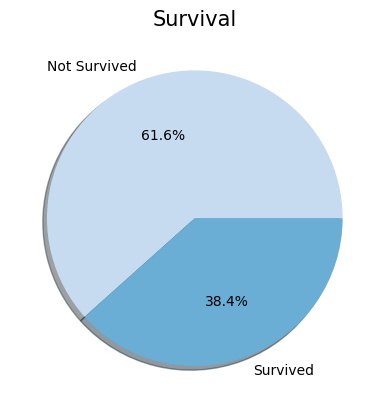

In [11]:
sns.set_palette('Blues',3)
plt.pie(data['Survived'].value_counts(),labels=['Not Survived','Survived'],shadow=True,autopct='%1.1f%%')
plt.title('Survival',fontsize=15)
plt.show()

More than <font color='steelblue'>60%</font> of Passengers <font color='#de1507'>Not Survived</font>

### Port of Embarkation, Passenger class and Sex 

In [12]:
cols = ['Sex','Embarked','Pclass']
for c in cols:print(c,'Unique Values: ',data[c].unique())

Sex Unique Values:  ['male' 'female']
Embarked Unique Values:  ['S' 'C' 'Q' nan]
Pclass Unique Values:  [3 1 2]


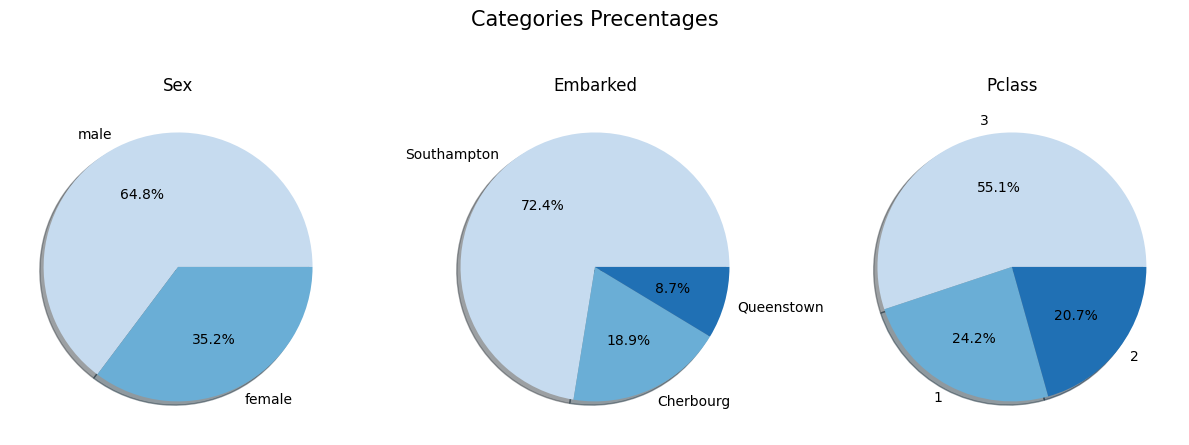

In [13]:
sns.set_palette('Blues',3)
labelss = {'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' :'Southampton'}
data['Embarked'] = data['Embarked'].replace(labelss)

def plot_pie(dataa,cols,title,fontsize=15,figsize=(12,5)):
    fig,ax = plt.subplots(1,len(cols),figsize=figsize)
    for i,col in enumerate(cols):
        ax[i].pie(dataa[col].value_counts(),labels=dataa[col].value_counts().index
        ,shadow=True,autopct='%1.1f%%')
        ax[i].set_title(col)

    fig.suptitle(title,fontsize=fontsize)
    fig.tight_layout()
    plt.show()
    
plot_pie(data,cols,'Categories Precentages')

1 - Men were the **majority** aboard the titanic

2 - Most Port of Embarkation was <font color='lightgreen'>Southampthon</font> (England)

3 - More than <font color ='steelblue'>50%</font> of Passengers were in <font color ='steelblue'>3rd Class</font>

### Cabin

In [14]:
data['Cabin'].isna().sum()

687

In [15]:
data['Cabins_letter'] = data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'None')
data['Cabins_letter'].value_counts(dropna=False)

Cabins_letter
None    687
C        59
B        47
D        33
E        32
A        15
F        13
G         4
T         1
Name: count, dtype: int64

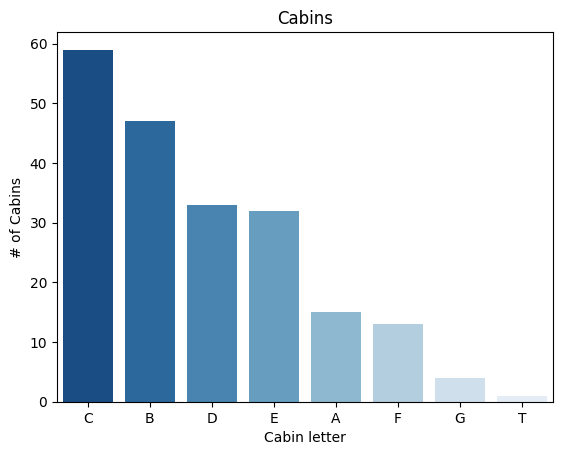

In [16]:

sns.barplot(x=data['Cabins_letter'].value_counts().index[1:],
            y=data['Cabins_letter'].value_counts().values[1:],palette='Blues_r')
plt.ylabel('# of Cabins');plt.xlabel('Cabin letter')
plt.title('Cabins')
plt.show()

we get the first letter of cabin name as maybe them in different floors on the ship, We will compare later if certain cabins have more chance to survive or not.

Unknown indicate the cabin number was missing data,

In [17]:
data.drop(columns=['Cabin'],inplace=True)

### Ticket

In [18]:
data['Ticket'].nunique()

681

In [19]:
data['Ticket'].sample(10)

631    347743
306     17421
498    113781
844    315090
372    323951
733     28425
725    315094
356    113505
342    248740
122    237736
Name: Ticket, dtype: object

In [20]:
data['Ticket'].value_counts()[:10]

Ticket
347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
Name: count, dtype: int64

This mean that people can be in groups aboard the ship.


In [21]:
pattern = re.compile('[a-zA-Z]')
data['Ticket'].apply(lambda x: ''.join(pattern.findall(x))).unique()

array(['A', 'PC', 'STONO', '', 'PP', 'CA', 'SCParis', 'SCA', 'SP', 'SOC',
       'WC', 'SOTONOQ', 'WEP', 'C', 'SCPARIS', 'SOP', 'Fa', 'LINE', 'FCC',
       'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS', 'SCAHBasle', 'SOPP',
       'FC', 'SOTONO', 'CASOTON'], dtype=object)

In [22]:
len(data[data['Ticket'].apply(lambda x : any(char.isalpha() for char in x))])

230

In [23]:
data['Ticket'].apply(lambda x : any(char.isalpha() for char in x))

0       True
1       True
2       True
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Ticket, Length: 891, dtype: bool

In [24]:
data['Ticket_letter'] = data['Ticket'].apply(lambda x : any(char.isalpha() for char in x))

In [25]:
data.groupby('Ticket')['Ticket'].transform('count').value_counts()

Ticket
1    547
2    188
3     63
4     44
7     21
6     18
5     10
Name: count, dtype: int64

In [26]:
data['Ticket_groups'] = data.groupby('Ticket')['Ticket'].transform('count')
data.drop(columns = ['Ticket'],inplace=True)

### Name

we can extract some information from Name column, like Title,surname,marriage status.

In [27]:
data['Name'].duplicated().any()

False

In [28]:
data['Name'].sample(10)

321                           Danoff, Mr. Yoto
675             Edvardsson, Mr. Gustaf Hjalmar
678    Goodwin, Mrs. Frederick (Augusta Tyler)
877                       Petroff, Mr. Nedelio
305             Allison, Master. Hudson Trevor
30                    Uruchurtu, Don. Manuel E
782                     Long, Mr. Milton Clyde
257                       Cherry, Miss. Gladys
561                          Sivic, Mr. Husein
331                        Partner, Mr. Austen
Name: Name, dtype: object

In [29]:
pattern = re.compile(r'(?P<title>[A-Za-z\s]+)\.')
data['Title'] = data['Name'].str.extract(pattern)
data['Title'].value_counts()

Title
 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: count, dtype: int64

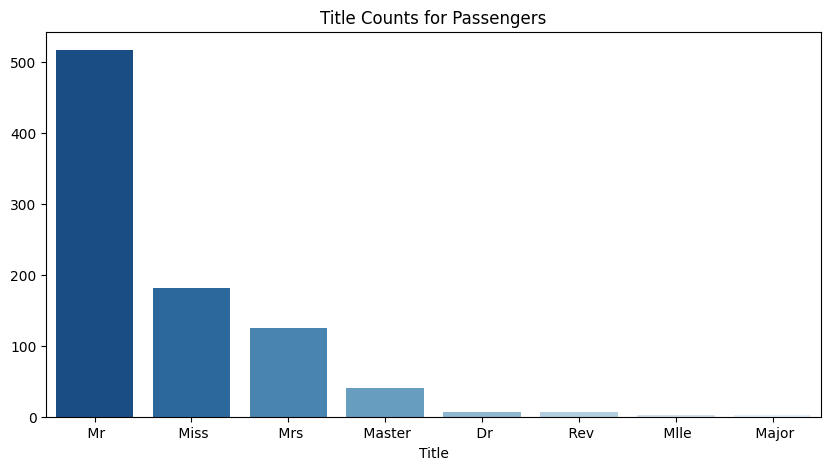

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x=data['Title'].value_counts()[:8].index,y=data['Title'].value_counts()[:8].values,palette='Blues_r')
plt.title('Title Counts for Passengers')
plt.show()

I googled for the meaning of each abbreviation and understand that we may benifit from adding major ones to dataframe.

tap below for detials..


<details>
    <summary><font size="4"><b>(Click to expand)</b></font></summary>


<br>

Mr: Mr is an abbreviation for Mister, a title used before a man's surname or full name as a courtesy title preceding his given or first name.

Miss: Miss is a title traditionally used for an unmarried woman or girl.

Mrs: Mrs is an abbreviation for Mistress, traditionally used for a married or widowed woman.

Master: Master is a title used for young boys, especially in formal and historical contexts.

Dr: Dr is an abbreviation for Doctor, a title used for individuals who have earned a doctoral degree, such as a Ph.D. or an M.D.

Rev: Rev is an abbreviation for Reverend, a title used for some Christian clergy, such as ministers or priests.

Major: Major is a military title for an officer ranking above a captain and below a lieutenant colonel.

Col: Col is an abbreviation for Colonel, a military rank.

Mlle: Mlle is an abbreviation for Mademoiselle, a French title equivalent to Miss.

Sir: Sir is a title of honor for a knight or baronet, used in English-speaking countries.

Ms: Ms is a title that does not specify marital status and can be used for women regardless of whether they are married or unmarried.

Capt: Capt is an abbreviation for Captain, a military or naval rank.

Mme: Mme is an abbreviation for Madame, a French title equivalent to Mrs.

Lady: Lady is a title for women of noble or aristocratic background.

Jonkheer: Jonkheer is a Dutch honorific for a young nobleman or squire.

Don: Don is a Spanish, Italian, and Portuguese title for a gentleman or nobleman.

the Countess: The Countess is a title for a female equivalent to a Count in nobility.

In [31]:
data['married_women'] = 0
data.loc[data['Title'].str.contains('Mrs'),'married_women'] = 1

In [32]:
data['married_women'].value_counts()

married_women
0    766
1    125
Name: count, dtype: int64

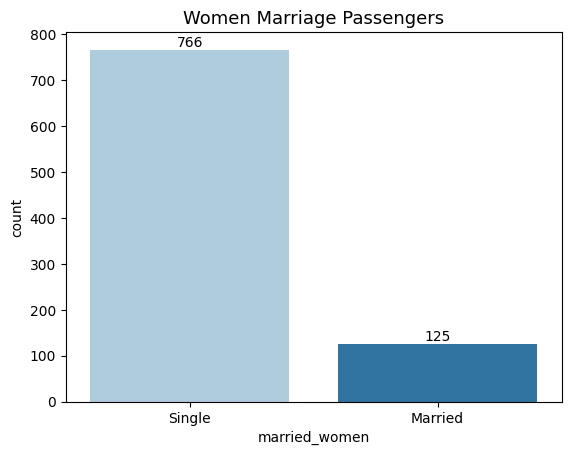

In [33]:
toplot = data['married_women'].value_counts()
# plt.pie(toplot.values,labels=['Single','Married'],autopct='%1.1f%%',shadow=True)
ax = sns.countplot(data=data,x='married_women',palette='Paired')
plt.title('Women Marriage Passengers',size=13);plt.xticks([0,1],labels=['Single','Married'])
ax.bar_label(ax.containers[0])
plt.show()

In [34]:
data['Title'] = data['Title'].str.strip().replace(['Miss','Mrs','Mlle','Ms','Mme','Lady','the Countess','Dona'],'Miss/Mrs/Ms')
data['Title'] = data['Title'].str.strip().replace(['Don','Jonkheer','Capt','Sir','Col','Major','Rev','Dr'],'Dr/Military/Noble/Clergy')
data['Title'].value_counts()

Title
Mr                          517
Miss/Mrs/Ms                 313
Master                       40
Dr/Military/Noble/Clergy     21
Name: count, dtype: int64

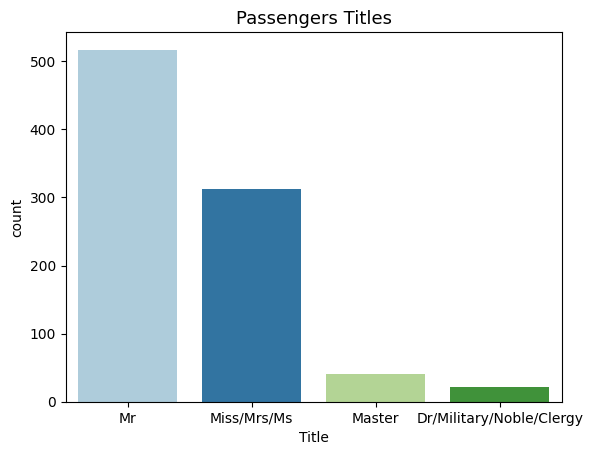

In [35]:
sns.countplot(data=data,x='Title',palette='Paired')
plt.title('Passengers Titles',size=13)
plt.show()

---

### Numirical Columns

#### AGE

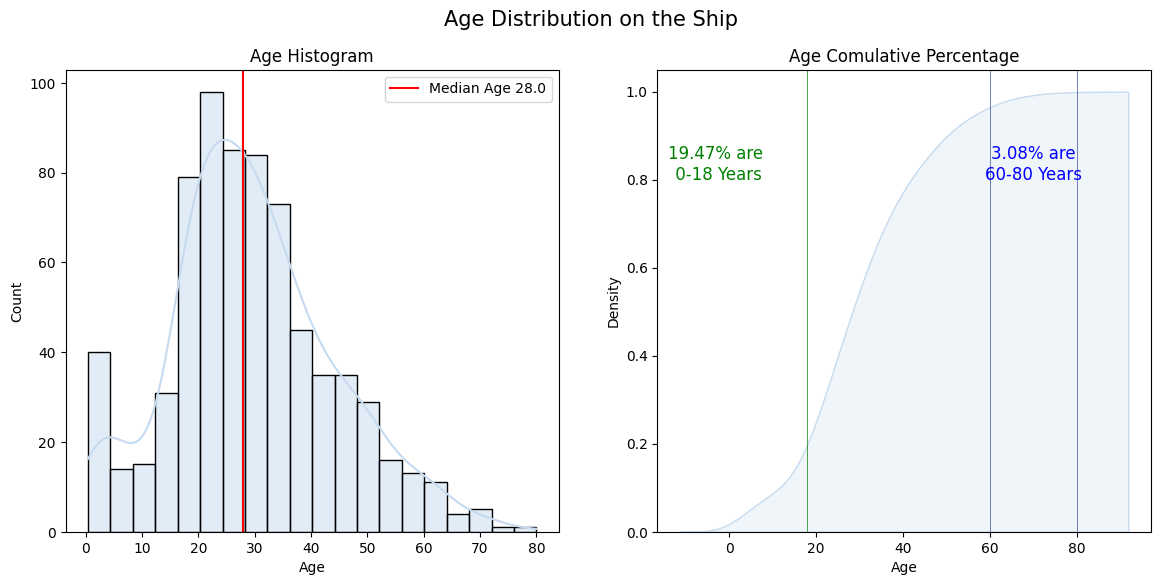

In [36]:
less18_years = percentileofscore(data['Age'],18,kind='weak',nan_policy='omit')
from80to60 = percentileofscore(data['Age'],80,kind='weak',nan_policy='omit')-\
            percentileofscore(data['Age'],60,kind='weak',nan_policy='omit')



fig,ax= plt.subplots(1,2,figsize=(14,6))
sns.set_palette('Paired')
sns.histplot(data=data,x='Age',kde=True,ax=ax[0])
sns.kdeplot(data=data,x='Age', cumulative=True,fill=True,ax=ax[1])

ax[0].axvline(data['Age'].median(),color='r',label=f"Median Age {data['Age'].median()}")
ax[1].axvline(18,color='g',label=f"{less18_years:.2f}% Less than 18 years",linewidth=.5)
ax[1].axvline(80,color='#384ca6',label=f"{from80to60:.2f}% from 60 to 80 Years",linewidth=.5)
ax[1].axvline(60,color='#384ca6',linewidth=.5)

ax[1].text(70, 0.8, f'{from80to60:.2f}% are\n60-80 Years', fontsize=12, ha='center', color='Blue')
ax[1].text(-3, 0.8, f'{less18_years:.2f}% are\n 0-18 Years', fontsize=12, ha='center', color='green')



ax[0].set_title('Age Histogram')
ax[1].set_title('Age Comulative Percentage')

fig.suptitle('Age Distribution on the Ship',fontsize=15)
ax[0].legend()
# ax[1].legend()

plt.show()

Age distribution almost getting close to normal distribution, We notice that there is many young People aboard the ship which we assume their **<font color='lightsteelblue'>Survival Rate is highest</font>** among others.

We will discuss the ability of both classes of survival later..

In [37]:
data['Age'].isna().sum()

177

In [38]:
data.groupby(['Pclass','Sex','Title'])['Age'].median()

Pclass  Sex     Title                   
1       female  Dr/Military/Noble/Clergy   49.00
                Miss/Mrs/Ms                35.00
        male    Dr/Military/Noble/Clergy   49.00
                Master                      4.00
                Mr                         40.00
2       female  Miss/Mrs/Ms                28.00
        male    Dr/Military/Noble/Clergy   46.50
                Master                      1.00
                Mr                         31.00
3       female  Miss/Mrs/Ms                21.50
        male    Master                      4.00
                Mr                         26.00
Name: Age, dtype: float64

In [39]:
data['Age'] = pd.Series(data.groupby(['Pclass','Sex','Title'])['Age'].apply(lambda x:x.fillna(x.median())).values)
data['Age_class'] = pd.cut(data['Age'],bins=[0,17,23,30,50,64,np.inf],include_lowest= True,labels=range(1,7)).astype(int)
data['Age_class'].value_counts()

Age_class
4    280
3    255
2    175
1    117
5     53
6     11
Name: count, dtype: int64

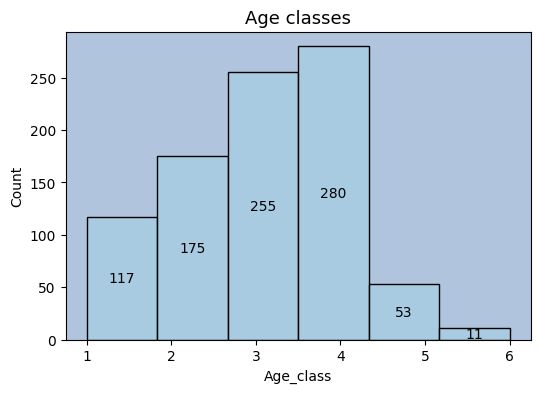

In [40]:
plt.figure(figsize=(6,4))
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})

a = sns.histplot(data=data,x='Age_class',color='#a6cee3',bins=6)
a.bar_label(a.containers[0],label_type='center')
plt.title('Age classes',size=13)
plt.show()

### # of Parents/Children

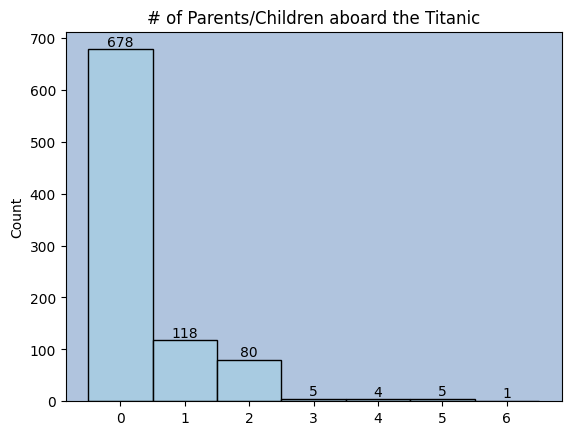

In [41]:
ax = sns.histplot(data['Parch'],discrete=True)
for i in ax.containers:ax.bar_label(i,)
plt.title('# of Parents/Children aboard the Titanic')
plt.xlabel('')
plt.show()

- Most passengers are without Parents or children on the ship, leaving 200+ passengers with Parents/Children.

- Are passengers with Parent or children has more chance or the opposite? we will see.

### # of siblings / spouses 

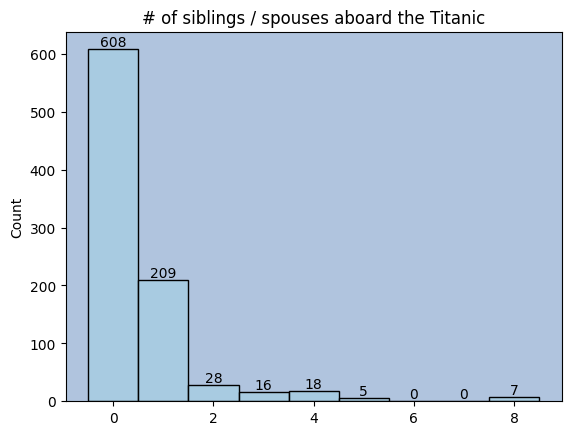

In [42]:
ax = sns.histplot(data=data,x='SibSp'
                  ,discrete=True
                 )
for i in ax.containers:ax.bar_label(i)
plt.title('# of siblings / spouses aboard the Titanic');plt.xlabel('')
plt.show()

- Most Passengers without siblings/spouses on the ship.

Let's create new feature that is combination from SibSp and Parch => Family Size on ship
this may help us to figure out some patterns

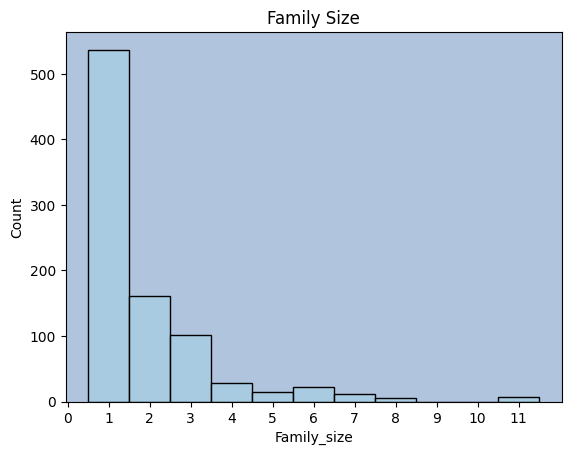

In [43]:
data['Family_size'] = data['SibSp']+data['Parch']+1
sns.histplot(data=data,x='Family_size',discrete=True)
plt.title('Family Size'); plt.xticks(range(12),range(0,12));plt.show()

In [44]:
data['Family_size'] = pd.cut(data['Family_size'],bins=[0,1,4,6,12],right=True,labels=['Alone','Small','Medium','Large'])
data['Family_size'].value_counts()

Family_size
Alone     537
Small     292
Medium     37
Large      25
Name: count, dtype: int64

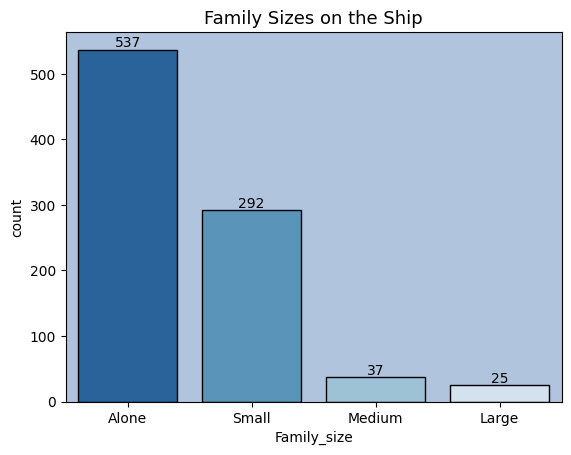

In [45]:
ax =sns.countplot(data=data,x='Family_size',palette='Blues_r',edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title('Family Sizes on the Ship',size=13);plt.show()

1- alone

2-4 small

4-6 medium

6-12 large

In [46]:
data.drop(columns=['SibSp','Parch','Name','PassengerId'],inplace=True)

---

## Fare

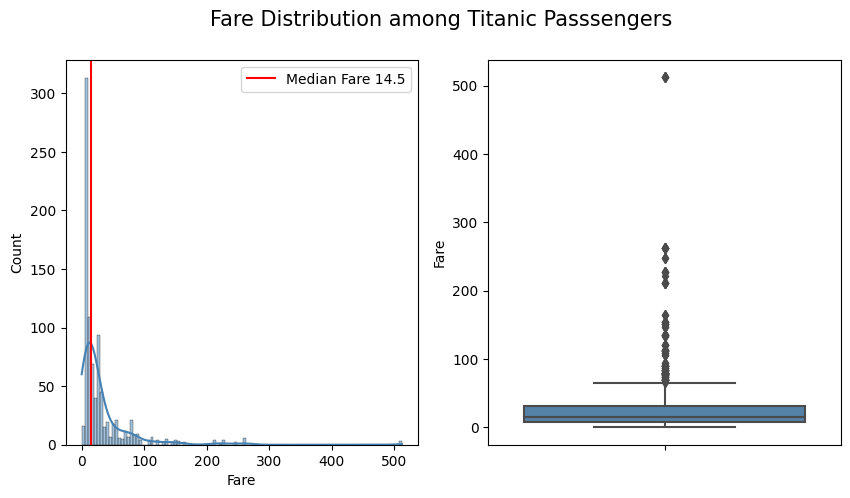

In [47]:
sns.set_style(rc = {'axes.facecolor': 'white'})

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=data,x='Fare',kde=True,color='steelblue',ax=ax[0])
ax[0].axvline(data['Fare'].median(),color='r',label=f"Median Fare {data['Fare'].median():.1f}")

sns.boxplot(data=data,y='Fare',ax=ax[1],color='steelblue')
ax[0].legend()
fig.suptitle('Fare Distribution among Titanic Passsengers',size=15)
plt.show()

- Box plot resulting many outlires in Fare column.

- Are People with alot of fare surivived?

Let's Solve the problem of Fare Distribution with cutting it into classes like we did with Age

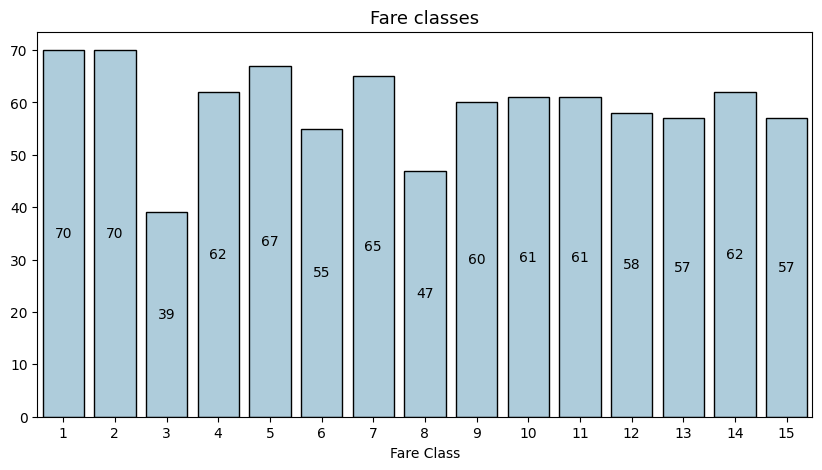

In [48]:
toplot = pd.qcut(data['Fare'], 15,labels=range(1,16)).value_counts()
plt.figure(figsize=(10,5));
a= sns.barplot(x=toplot.index,y=toplot.values,color='#a6cee3',edgecolor='black')
a.bar_label(a.containers[0],label_type='center')
plt.title('Fare classes',size=13);plt.xlabel('Fare Class')
plt.show()

In [49]:
data['Fare_class'] = pd.qcut(data['Fare'],15,labels=range(1,16)).astype(int)

<a name='4'></a>
# 4- Bivariate Analysis

### Survival Among Differnet Categories

In [50]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabins_letter,Ticket_letter,Ticket_groups,Title,married_women,Age_class,Family_size,Fare_class
0,0,3,male,49.00,7.25,Southampton,None,True,1,Mr,0,4,Small,2
1,1,1,female,38.00,71.28,Cherbourg,C,True,1,Miss/Mrs/Ms,1,4,Small,14
2,1,3,female,35.00,7.92,Southampton,None,True,1,Miss/Mrs/Ms,0,4,Alone,4
3,1,1,female,58.00,53.10,Southampton,C,False,2,Miss/Mrs/Ms,1,5,Small,13
4,0,3,male,35.00,8.05,Southampton,None,False,1,Mr,0,4,Alone,5


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Sex            891 non-null    object  
 3   Age            891 non-null    float64 
 4   Fare           891 non-null    float64 
 5   Embarked       889 non-null    object  
 6   Cabins_letter  891 non-null    object  
 7   Ticket_letter  891 non-null    bool    
 8   Ticket_groups  891 non-null    int64   
 9   Title          891 non-null    object  
 10  married_women  891 non-null    int64   
 11  Age_class      891 non-null    int64   
 12  Family_size    891 non-null    category
 13  Fare_class     891 non-null    int64   
dtypes: bool(1), category(1), float64(2), int64(6), object(4)
memory usage: 85.6+ KB


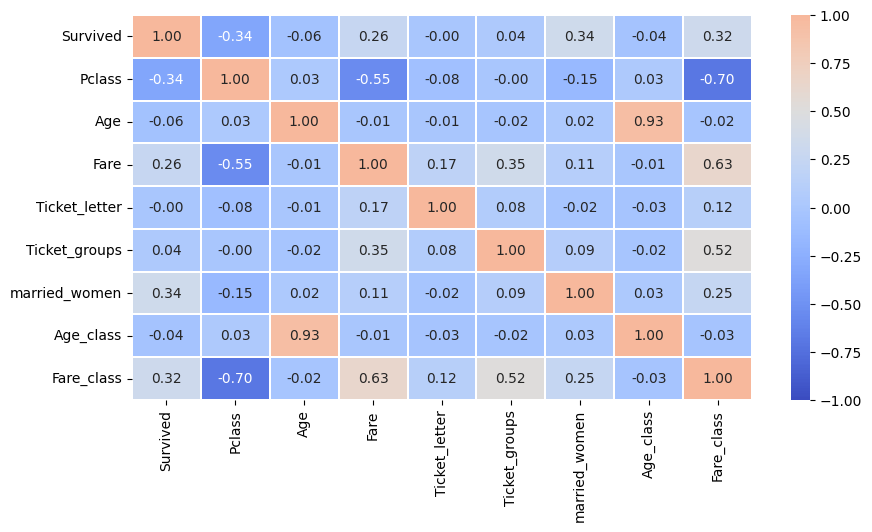

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(data.drop(columns=['Sex','Embarked','Title','Cabins_letter','Family_size'])\
            .corr(),cmap='coolwarm',vmin=-1,vmax=1,center=.5,annot=True,fmt='.2f',linewidth=.1)
plt.show()

- we noticed <font color='lightgreen' size=2.5>High correlations</font> between (Passenger Class and Fare Class)
- **Medium correlations** between (Survived and Fare Class), (Ticket Groubs(frequency) and Fare Class), (married Women and Survived), (Passenger Class and Survived)

## Cabins

In [53]:
data['Cabins_letter'].value_counts()

Cabins_letter
None    687
C        59
B        47
D        33
E        32
A        15
F        13
G         4
T         1
Name: count, dtype: int64

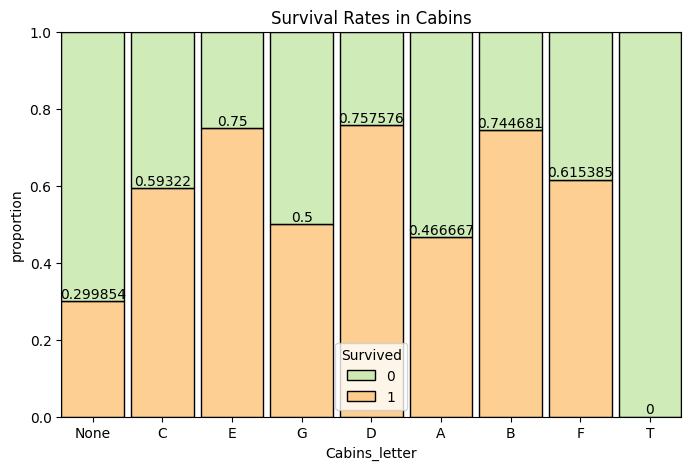

In [54]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(x='Cabins_letter', hue='Survived', data=data,palette='Spectral_r',edgecolor='black'
             ,multiple='fill',discrete=True,shrink=.9)
ax.bar_label(ax.containers[0])
plt.title('Survival Rates in Cabins');plt.ylabel('proportion')
plt.show()

- we can notice that <font color='lightsteelblue'>**E,D,B**</font> cabins have highest Survival Rates among all sections, when **None** has the loweset which is intersting that there is diffirence in rates based on cabin letter which may return to surivive priority people in control did or the other senario is the sections time of sinking and difficulity path to boats.

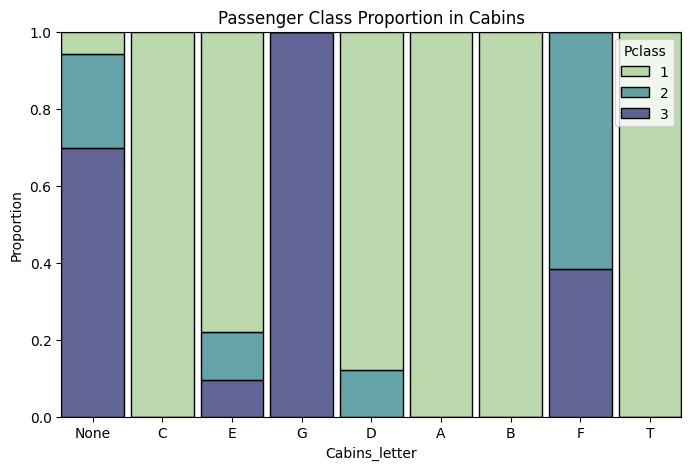

In [55]:
plt.figure(figsize=(8,5))
ax =sns.histplot(data=data,x='Cabins_letter',hue='Pclass',
                multiple="fill", stat="proportion",palette='crest',
                 discrete=True, shrink=.9)
plt.title('Passenger Class Proportion in Cabins')
plt.show()

- 100% of 1st class are **<font color='lightsteelblue'>A,B,C and T</font>** when **D** contains 1st and 2nd classes.
- If we continue as assuming that there is senario for help 1st class people to survive first, telling the person in (A,B,C,T) or not would be important to predict his survival.

In [56]:
def cabins(x): 
    if x in 'ABC':
        return 'ABCT'
    elif x in 'DE':
        return 'DE'
    elif x in 'FG':
        return 'FG'
    else: return 'NN'
data['Cabins_letter_class'] = data['Cabins_letter'].apply(cabins)
data['Cabins_letter_class'].value_counts()

Cabins_letter_class
NN      688
ABCT    121
DE       65
FG       17
Name: count, dtype: int64

we found cabins letter benefits us so far, so we will continue to compare it with other categories..

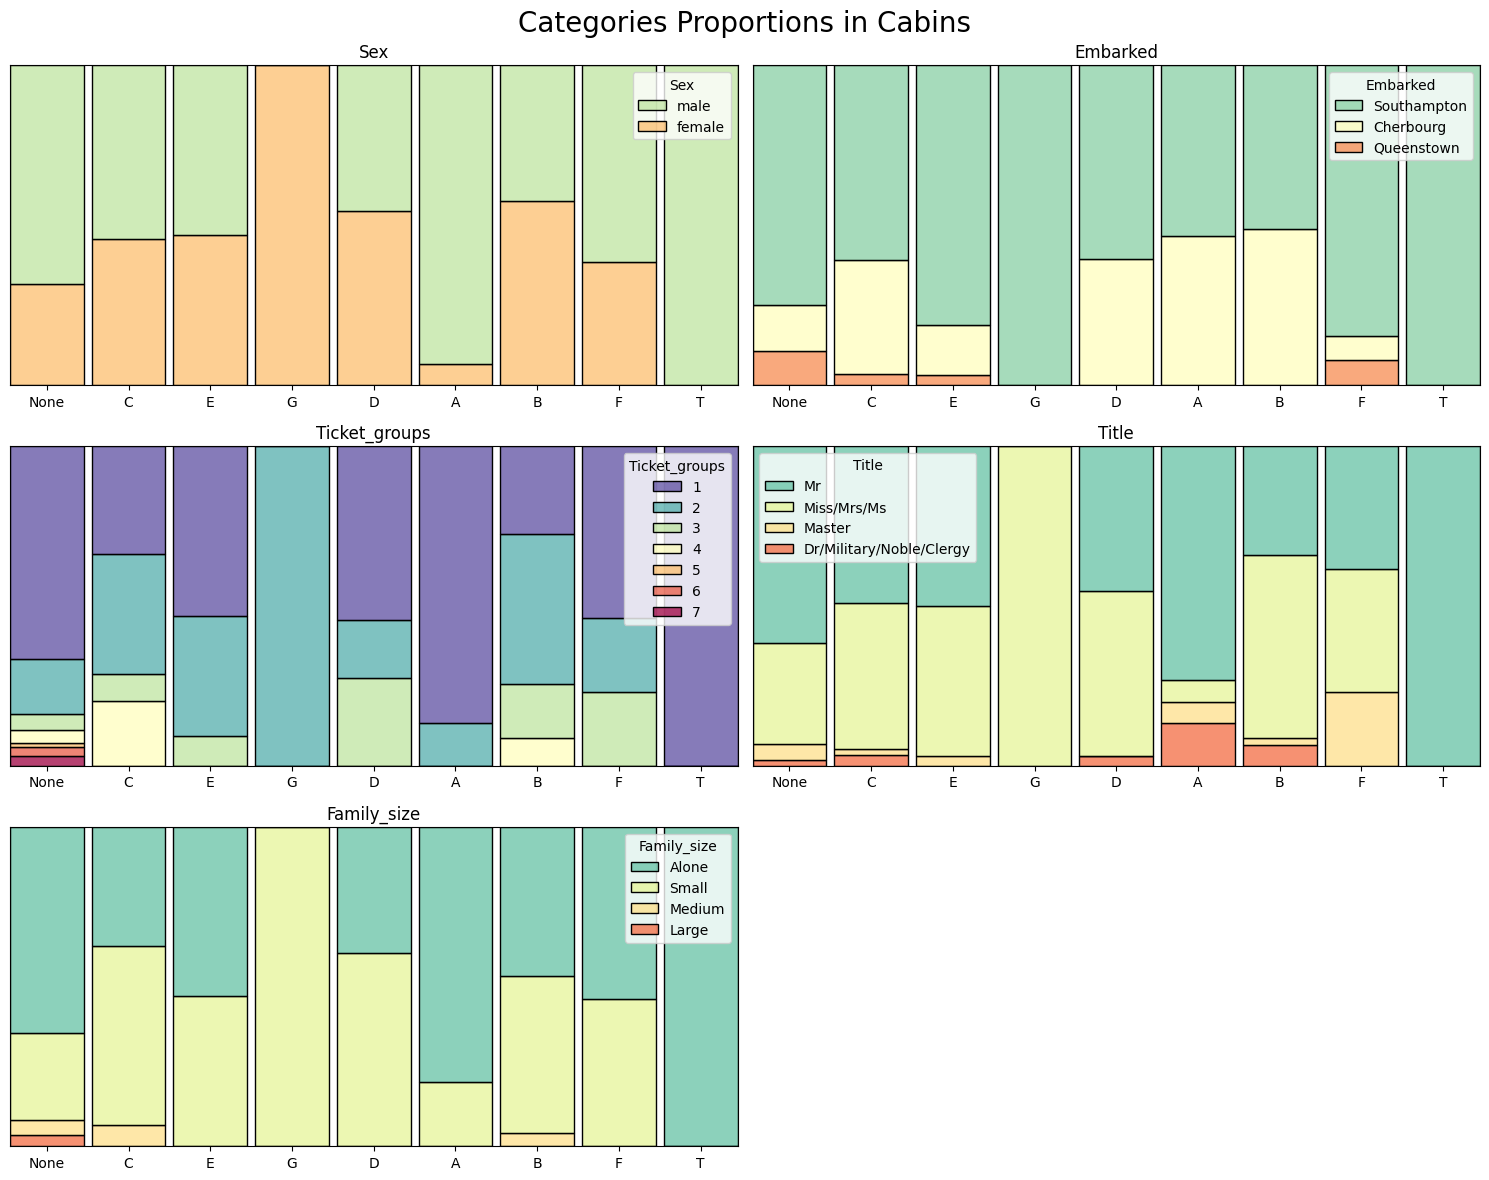

In [57]:
fig= plt.figure(figsize=(15,12))
for i,c in enumerate(['Sex','Embarked','Ticket_groups','Title','Family_size']):
    plt.subplot(3,2,i+1)
    a = sns.histplot(data=data,x='Cabins_letter',hue=c,
                multiple="fill", stat="proportion",palette='Spectral_r',
                 discrete=True, shrink=.9)
    a.set_ylabel('');a.set_yticks([]);a.set_xlabel('');a.set_title(c)
fig.suptitle('Categories Proportions in Cabins',size=20)
fig.tight_layout()
plt.show()

Some important notes:

- we can notice that T,G cabins 100% of Southampton while A,B and D are consisted of both Southampton and Cherbourg.
- Master (young male) Age class is in F,A,E,B,None,C (ordered) and not in T,G,D while classes of ('Dr','Military','Noble','Clergy') -those i think have more priority in survive boats- are in A,B,C,D.
- Groups (knowen by ticket duplicates) consisted of 4 members are in B,C which is intersting that A is only consisted of (1,2), And that is confirmed for us when we look at Family_size plot in A cabin, we notice that is consisted of ('Alone','Small') Family size 
At all from figure above we can extract that each group of  (A,B,C,D),('G,'T'),('F','E') cabins share some charactaristics as we mentioned 

In [58]:
data.drop(columns=['Cabins_letter'],inplace=True)
data['Ticket_letter']=data['Ticket_letter'].replace({True:1,False:0})

In [59]:
data.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Ticket_letter,Ticket_groups,Title,married_women,Age_class,Family_size,Fare_class,Cabins_letter_class
0,0,3,male,49.00,7.25,Southampton,1,1,Mr,0,4,Small,2,NN
1,1,1,female,38.00,71.28,Cherbourg,1,1,Miss/Mrs/Ms,1,4,Small,14,ABCT


## Passegner Class

In [60]:
def bar_labels_func(a):
    for container in a.containers:
            heights = [str(round(height.get_height() * 100,1))+'%' for height in container]
            a.bar_label(container, labels=heights, label_type='center')

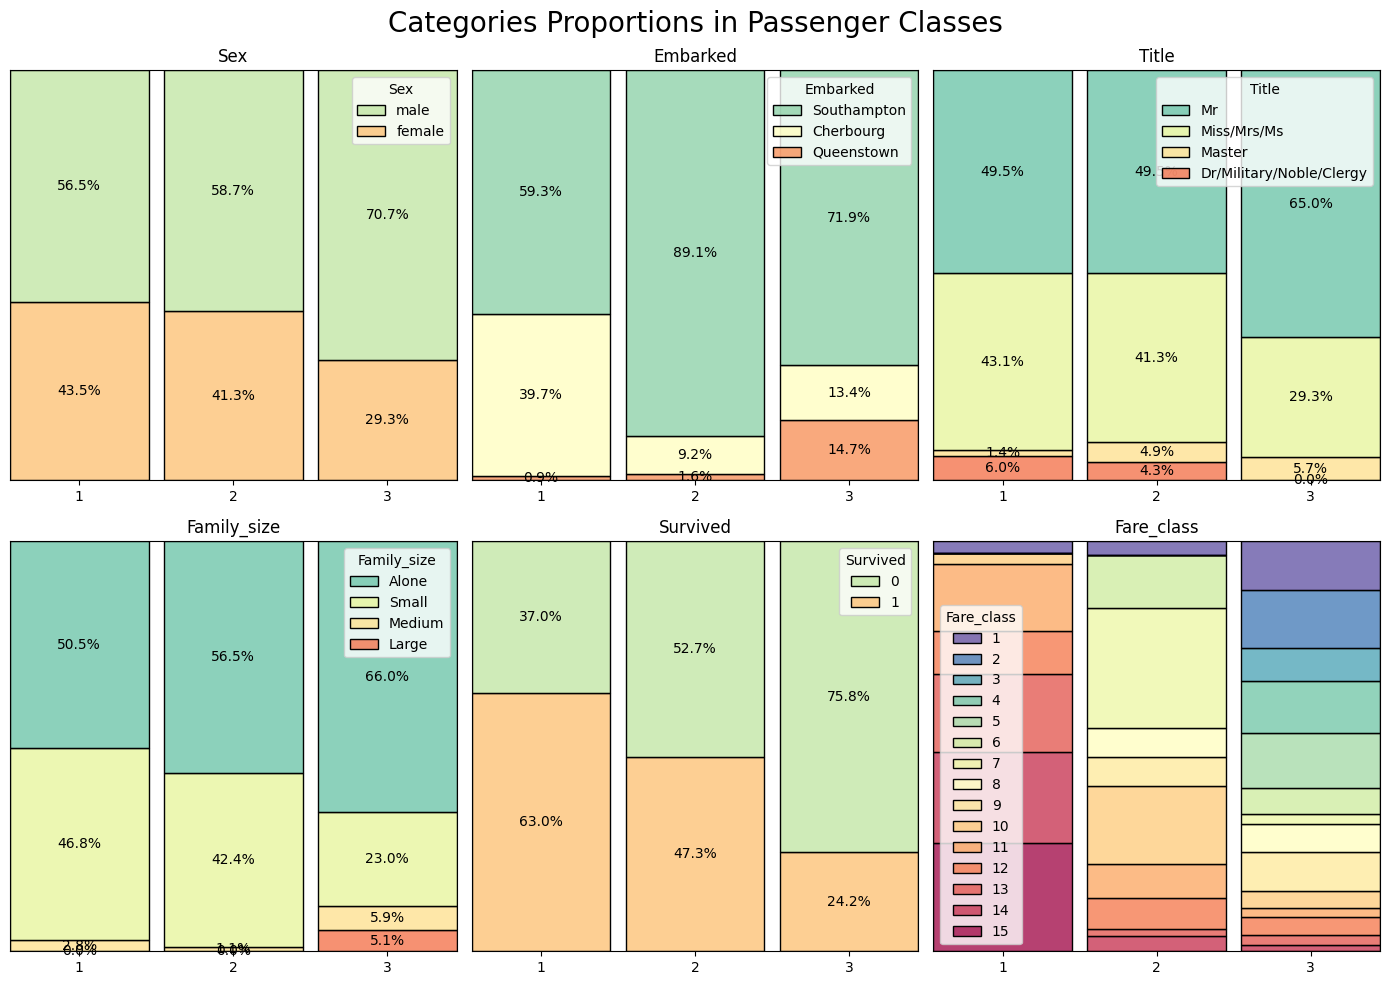

In [61]:
fig= plt.figure(figsize=(14,10))
for i,c in enumerate(['Sex','Embarked','Title','Family_size','Survived','Fare_class']):
    plt.subplot(2,3,i+1)
    a = sns.histplot(data=data,x='Pclass',hue=c,
                multiple="fill", stat="proportion",palette='Spectral_r',
                 discrete=True, shrink=.9)
    a.set_ylabel('');a.set_yticks([]);a.set_xlabel('');a.set_xticks([1,2,3]);a.set_title(c)
    if len(data[c].unique())<5: bar_labels_func(a)

fig.suptitle('Categories Proportions in Passenger Classes',size=20)
fig.tight_layout()
plt.show()

Some important notes about Passenger Class:
- First,Second classes: equally sex distributed, rare <font color= 'lightsteelblue'>**Queenstown**</font> port passengers, Unique in having  <font color= 'lightsteelblue'>**'Dr/Military/Noble/Clergy' titles**</font>, don't have large families,  <font color= 'lightsteelblue'>**HIGH survival rate**</font>, People with alot of fare in there.
- Third class: male is majority, Large Families found,  <font color= 'red'>Low Survival rate</font>.

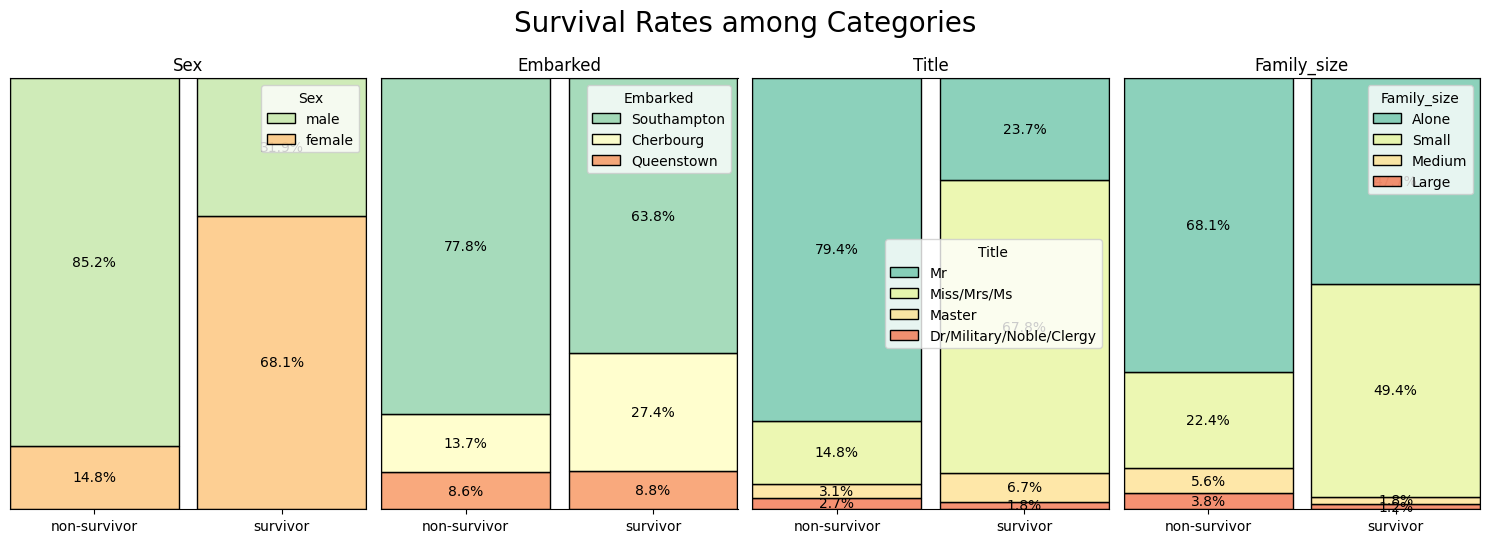

In [62]:
fig= plt.figure(figsize=(15,5.5))
for i,c in enumerate(['Sex','Embarked','Title','Family_size']):
    plt.subplot(1,4,i+1)
    a = sns.histplot(data=data,x='Survived',hue=c,
                multiple="fill", stat="proportion",palette='Spectral_r',
                 discrete=True, shrink=.9)
    a.set_ylabel('');a.set_yticks([]);a.set_xticks(range(2),['non-survivor','survivor']);a.set_xlabel('');a.set_title(c)
    bar_labels_func(a)

fig.suptitle('Survival Rates among Categories',size=20)
fig.tight_layout()
plt.show()

Important notes about survival rates:
- **Sex**: The majority of **women** survived, while majority of men didn't survive.

- **Family_size**: High percentage of **large** families didn't survive when most of **medium** families survived.
- **Embarkation Port**: Majority of Passengers who come from Charbourg(France) Survived.

- **Title**: we mention all related before, no news but we can notice that 'Dr/Military/Noble/Clergy' titles majority of them not survived which is surprise but i can guess that those people was in charge and can't leave the ship early becuase of responsibilities.

#### Age distribution in data

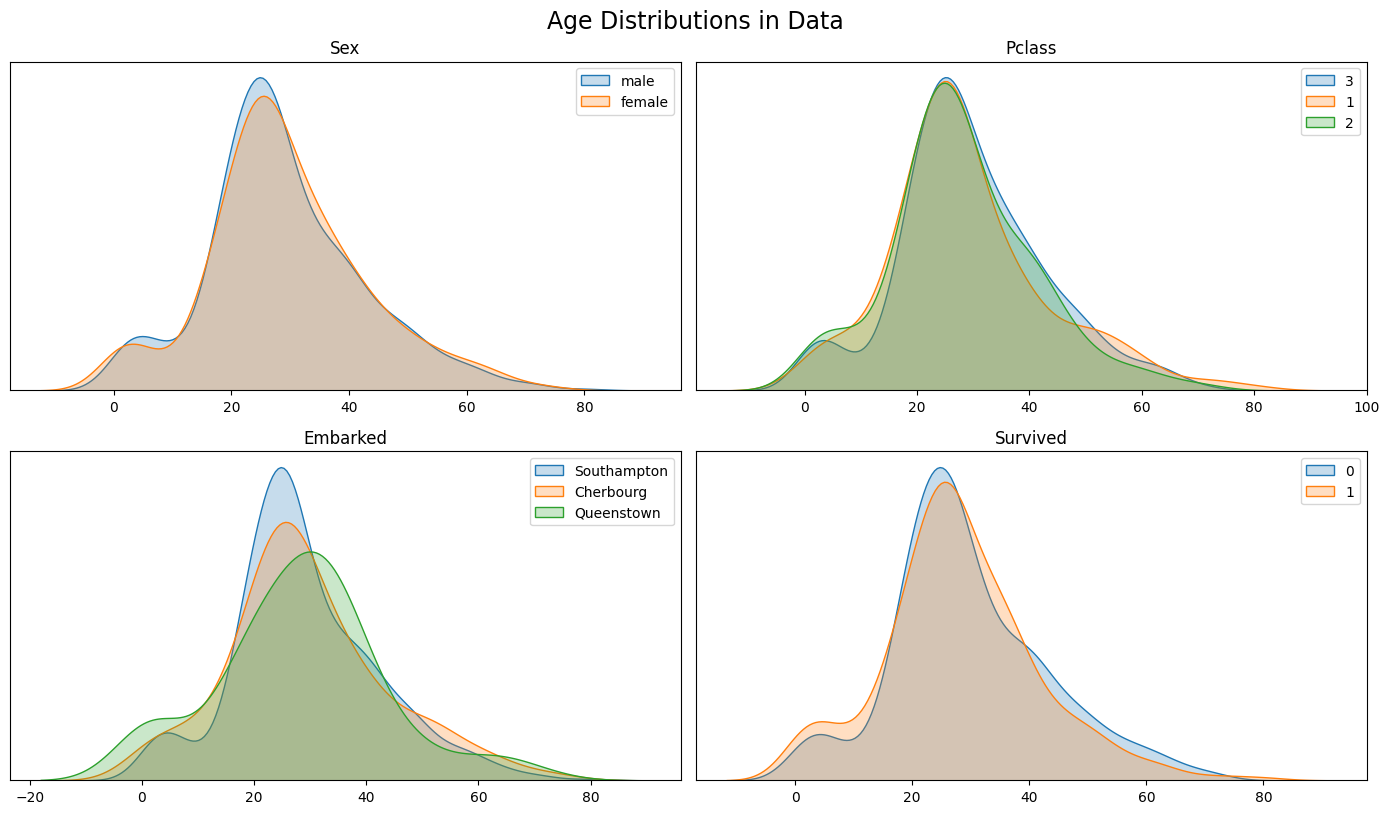

In [63]:
cat_cols=['Sex','Pclass','Embarked','Survived']
def automated_dist(num_col,additionalcolumns=0):
    fig = plt.figure(figsize=(14,12))
    
    cat_colmns = copy.deepcopy(cat_cols)
    if additionalcolumns:cat_colmns.extend(additionalcolumns)

    for i,col in enumerate(cat_colmns):
        plt.subplot(3,2,i+1)
        toplot = data[col].unique().tolist()
        for ind,j in enumerate(toplot):
            g = sns.kdeplot(data = data[data[col]==j],x=num_col,label=j,fill=True)
        g.set_xlabel('');g.set_ylabel('');plt.yticks([])
        g.set_title(col);g.legend()

    fig.suptitle(f"{num_col} Distributions in Data",size=17)
    fig.tight_layout()
    plt.show()
    
sns.set_palette('tab10')
automated_dist('Age')

**Sex**: <font color='steelblue'>Equally</font> distributed.

**Passenger Class**: <font color='steelblue'>Class A</font> (1st class) Ages tend to be <font color='steelblue'>older</font> than others.

**Embarkation port**: <font color='steelblue'>Old Passengers (60-80)</font> are from <font color='steelblue'>Queenstown</font> Embarkation port.

**Survival**: Old Passengers (60-80) most of them <font color='#c22727'>not survived</font>.

#### Fare distribution in data

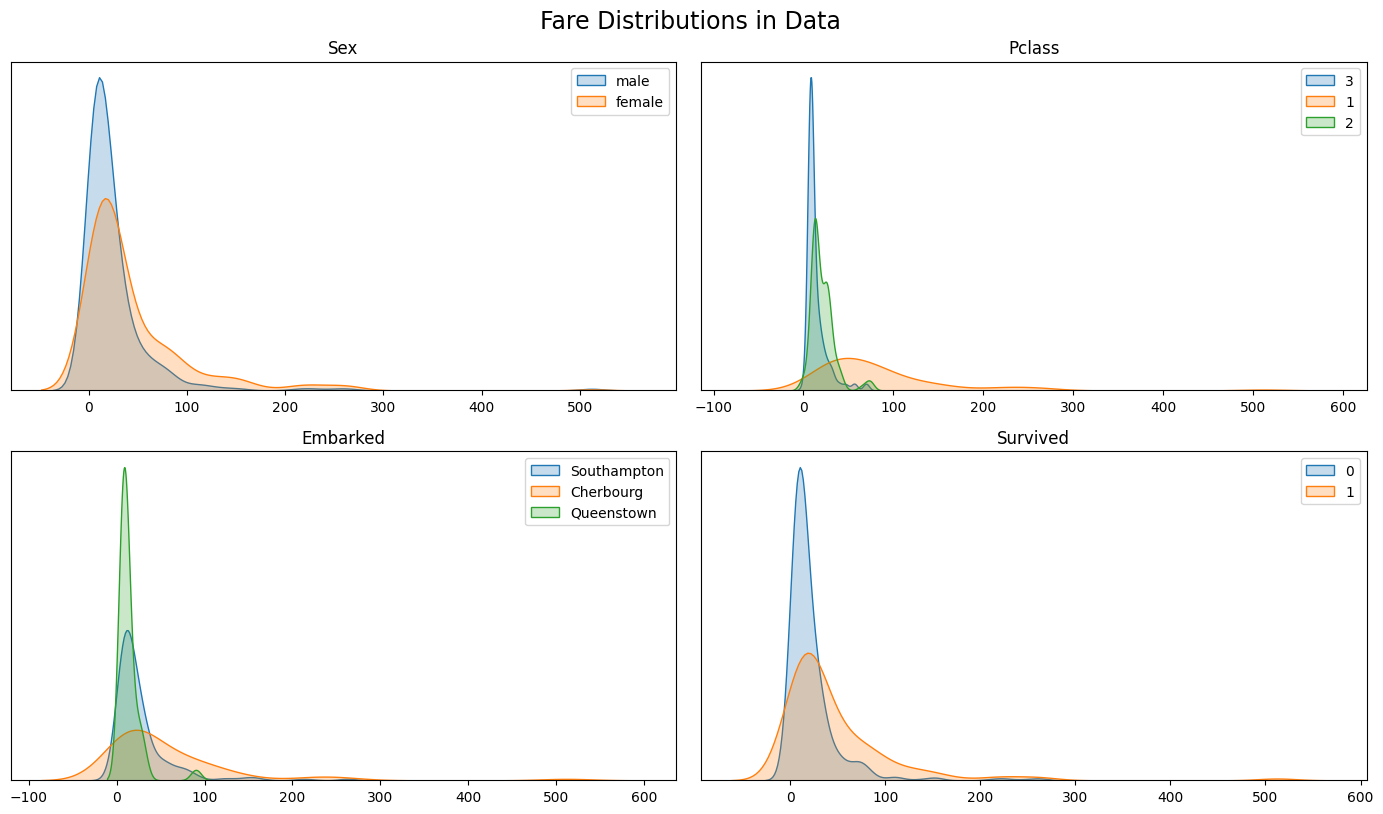

In [64]:
automated_dist('Fare')

- People with alot of Fare are <font color='steelblue'>Female</font>, <font color='steelblue'>Class A</font> Passenger Class, <font color='steelblue'>Charbourg</font> Embarkation port, And most of them <font color='#c22727'>Survived</font>

----

<a name='44'></a>

# 5- Conclusion

Exploring the Titanic dataset reveals **fascinating details** about passengers and their survival. Surprisingly, more than **60%** of passengers did not survive, mostly being men. The main starting point was **Southampton**, and over **50%** of passengers were in the `3rd class`, showing a clear class difference. The age distribution looked like a typical curve, with more younger passengers, possibly influencing who survived.

When we looked at cabins, some, like **Cabins E, D, and B**, had higher survival rates. We found connections between passenger and fare class, suggesting that where people stayed on the ship related to their ticket prices. Understanding different passenger classes showed clear differences in survival rates, with 1st and 2nd classes having higher rates. Examining factors like gender, family size, embarkation port, and titles gave us a more detailed picture. Interestingly, those with titles like '`Dr/Military/Noble/Clergy`' surprisingly had lower survival rates, prompting more questions.

Taking a closer look at passengers with high fares, we discovered a group that was mostly female, 1st class, and from **Cherbourg**, with notably higher survival rates. This made us wonder about preferential treatment during evacuation based on socio-economic factors. Overall, the Titanic dataset goes beyond numbers, providing a story of social dynamics, spatial influences, and unexpected connections, giving us insights into the tragic events that unfolded.


<a name='5'></a>
# 6- Data Preprocessing

In [65]:
data.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Ticket_letter,Ticket_groups,Title,married_women,Age_class,Family_size,Fare_class,Cabins_letter_class
0,0,3,male,49.00,7.25,Southampton,1,1,Mr,0,4,Small,2,NN
1,1,1,female,38.00,71.28,Cherbourg,1,1,Miss/Mrs/Ms,1,4,Small,14,ABCT


In [66]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C


## Initial Plan to preprocess features:
<font size=3>
    
- Columns to **DROP**: PassengerId,Name,Ticket,Cabin,SibSp,Parch,Fare,Age

- Columns to **Create**: Cabin_letter_class,Age_class,Fare_class,Family_size,Ticket_letter,Ticket_groups,Title,married_women.

- Pclass,Cabins_letter_class,Embarked(i suggest to drop from beginning),Title: OneHotEncoding

- Sex,Family_size: Label Encoder.

- Fare_class,Age_class,Ticket_groups,Ticket_letter: ready

- Cabin_letter_class: transform this column to ( 0,1 -> there is letter in cabin or (no or null))
    
</font>


In [67]:
set_config(transform_output='pandas',display='diagram')

<a name='5.1'></a>
# 6.1 Quick Pipeline

The following pipeline continue the process we done before on `data` dataframe to suit ML models for testing.

In [68]:
cat_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse=False))
])
fam_pipeline2= Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder(categories=[['unkown','Alone','Small','Medium','Large']]))
])
sex_pipeline3= Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder(categories=[['female','male']]))
])
totest_preprocess = ColumnTransformer([
    ('cat',cat_pipeline,['Cabins_letter_class','Title','Embarked']),
    ('fz',fam_pipeline2,['Family_size']),
    ('sx',sex_pipeline3,['Sex']),
    ('todrop','drop',['Age','Fare'])

],verbose_feature_names_out=False,remainder='passthrough')

In [69]:
X,y = data.drop(columns=['Survived']),data['Survived']
X = pd.DataFrame(totest_preprocess.fit_transform(X),columns=totest_preprocess.get_feature_names_out())
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,stratify=y)

In [70]:
x_train.shape
RandomForestClassifier()

RandomForestClassifier()

In [71]:
fitted_rf = RandomForestClassifier(
    n_estimators=1750,max_depth=7,min_samples_split=6,
    min_samples_leaf=6,max_features='auto',oob_score=True,random_state=77,n_jobs=-1) 

fitted_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, max_features='auto', min_samples_leaf=6,
                       min_samples_split=6, n_estimators=1750, n_jobs=-1,
                       oob_score=True, random_state=77)

In [72]:
select = SelectFromModel(estimator=fitted_rf,prefit=True)
selected_data = select.fit_transform(x_train,y_train)

In [73]:
cv = cross_val_score(estimator=fitted_rf,X=selected_data,y=y_train,
                     cv=5,n_jobs= -1)
print(cv)
print('Mean Accuarcy: ',cv.mean())

[0.81818182 0.81118881 0.79577465 0.84507042 0.8028169 ]
Mean Accuarcy:  0.814606520240323


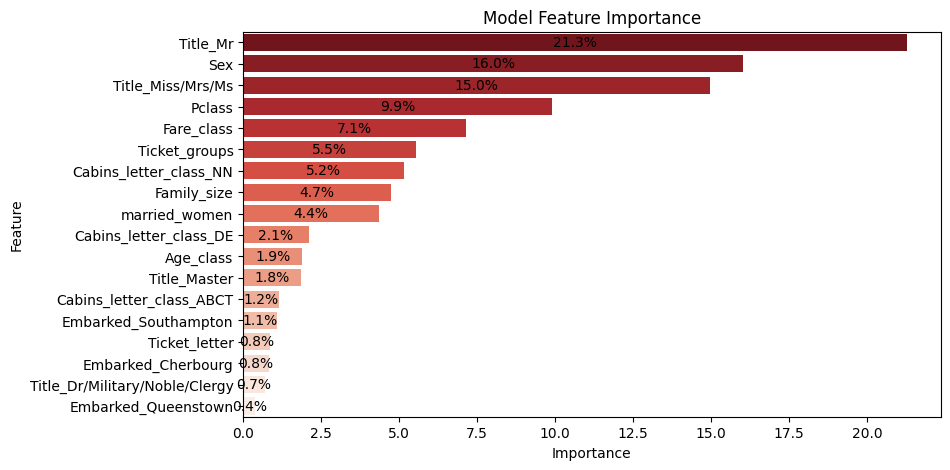

In [74]:
feature_importances = fitted_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_train.columns,
                                      'Importance': feature_importances}).sort_values(by='Importance',
                                                                                      ascending=False)
plt.figure(figsize=(9, 5))
a = sns.barplot(y=feature_importance_df['Feature'][:18], x=feature_importance_df['Importance'][:18]*100,palette='Reds_r')
heights = [str(round(height ,1))+'%' for height in a.containers[0].datavalues]
a.bar_label(a.containers[0], labels=heights, label_type='center')
plt.title('Model Feature Importance')
plt.show()

In [75]:
df.sample(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.00,1,1,F.C.C. 13529,26.25,NaN,S


In [76]:
x_train.sample(1)

,Cabins_letter_class_ABCT,Cabins_letter_class_DE,Cabins_letter_class_FG,Cabins_letter_class_NN,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Family_size,Sex,Pclass,Ticket_letter,Ticket_groups,married_women,Age_class,Fare_class
826,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,3,0,7,0,2,13


---

<a name='5.2'></a>
# 6.2 Full Pipeline

<font size=3>This pipeline evolved through trial and error, undergoing numerous enhancements as the machine learning cycle demanded.</font>

Full pipeline will convert data from the source `titanic/train`
into ready data suitable for ML.

In [77]:
# cabin letter class pipeline:
def cabin_col_prepared(daf):
    cabins = lambda x: 'ABCT' if x[0] in 'ABC' else ('DE' if x[0] in 'DE' else ('FG' if x[0] in 'FG' else 'NN'))
    daf['Cabin'] = daf['Cabin'].apply(cabins)
    return daf[['Cabin']]
    
cabin_pipeline_base = Pipeline([
    ('impute',SimpleImputer(strategy='constant',fill_value='NN')),
    ('convert',FunctionTransformer(cabin_col_prepared,validate=False)),
])

cabin_pipeline = Pipeline([
    ('base',cabin_pipeline_base),
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse=False))
])


# Name (title) extractrion pipeline:
def process_name_column(daf):
    pattern = re.compile(r'(?P<title>[A-Za-z\s]+)\.')
    daf['Title'] = daf['Name'].str.extract(pattern)
    daf['Title'] = daf['Title'].str.strip().replace(
        ['Miss', 'Mrs', 'Mlle', 'Ms', 'Mme', 'Lady', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
    daf['Title'] = daf['Title'].str.strip().replace(
        ['Don', 'Jonkheer', 'Capt', 'Sir', 'Col', 'Major', 'Rev', 'Dr'], 'Dr/Military/Noble/Clergy')
    return daf[['Title']]  

title_pipeline_base = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('convert',FunctionTransformer(process_name_column,validate=False)),
])
title_pipeline = Pipeline([
    ('base',title_pipeline_base),
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse=False))
])


# surname pipline
def surname_func(daf):
    return pd.DataFrame(daf['Name'].apply(lambda x : x.split(',')[0])).rename(columns={'Name':'Surname'})

surname_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('convert',FunctionTransformer(surname_func,validate=False))
])


# Family Size Pipeline:
def family_size_func(daf):
    return pd.DataFrame(pd.cut((daf['SibSp']+daf['Parch']+1),bins=[0, 1, 4, 6, np.inf], right=True,
                               labels=['Alone', 'Small', 'Medium', 'Large'])).rename(columns={0:'Family_size'})

family_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('convert',FunctionTransformer(family_size_func,validate=False)),
    ('encoder',OrdinalEncoder(categories=[['unkown','Alone','Small','Medium','Large']])) # better in score
#     ('encoder',OneHotEncoder(handle_unknown='ignore',sparse=False))

])


# Ticket groups Pipline 
def ticket_groups_func(daf):
    return pd.DataFrame(daf['Ticket'].map(daf['Ticket'].value_counts())).rename(columns={'Ticket':'Ticket_groups'})
    
ticket_groups_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('convert',FunctionTransformer(ticket_groups_func,validate=False))
])

#married women Pipline:
def married_w(daf):
    daf['married_women'] = 0
    daf.loc[daf['Name'].str.contains('Mrs'), 'married_women'] = 1
    return daf[['married_women']]
    
married_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('convert',FunctionTransformer(married_w,validate=False))
])

# Age class pipeline:
def age_class_func(daf):
    dd = daf.copy()
    dd['Title'] = dd['Name'].str.extract(r'(?P<title>[A-Za-z\s]+)\.')
    dd['Age'] = dd.groupby(['Pclass', 'Sex', 'Title'])['Age'].transform(lambda x: x.fillna(x.median()))
    dd['Age'].fillna(dd['Age'].median(),inplace=True)
    assert (~dd['Age'].isna().any())
    return pd.DataFrame(pd.qcut(dd['Age'],9,labels=range(1,10))).astype(int)
    
age_pipeline = Pipeline([
    ('imputer&convert',FunctionTransformer(age_class_func,validate=False))
])

# Fare Pipeline
def fare_func(daf):
    return pd.DataFrame(pd.qcut(daf['Fare'],14,labels=range(1, 15))).astype(int)

fare_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('imputer&convert',FunctionTransformer(fare_func,validate=False))
])
# Category Pipelines
cat_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse=False))
])
cat_pipeline2 = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder())
])
    
sex_pipeline_base= Pipeline([('impute',SimpleImputer(strategy='most_frequent'))])   

sex_pipeline= Pipeline([
    ('base',sex_pipeline_base),
    ('encoder',OrdinalEncoder(categories=[['female','male']]))
])





fullpreprocessing = ColumnTransformer([
    ('cabin_base',cabin_pipeline_base,['Cabin']),
    ('cabin',cabin_pipeline,['Cabin']),
    ('title_base',title_pipeline_base,['Name']),
    ('title',title_pipeline,['Name']),
    ('surname',surname_pipeline,['Name']),
    ('family',family_pipeline,['SibSp','Parch']),
    ('ticket_groups',ticket_groups_pipeline,['Ticket']),
    ('married_women',married_pipeline,['Name']),
    
    ('age_class',age_pipeline,['Age','Name','Pclass','Sex']),
    ('fare_class',fare_pipeline,['Fare']),
    
    ('cat',cat_pipeline,['Pclass']),
    ('embarked',cat_pipeline2,['Embarked']),
    ('sx_base',sex_pipeline_base,['Sex']),
    ('sx',sex_pipeline,['Sex']),
    ('todrop','drop',['PassengerId','SibSp','Parch'])

],verbose_feature_names_out=True,remainder='passthrough')



TargetEncoding_processing = ColumnTransformer([
    ('Sex_SR',TargetEncoder(),['sx_base__Sex']),
    ('Surname_SR',TargetEncoder(),['surname__Surname']),
    ('Title_SR',TargetEncoder(),['title_base__Title']),
    ('Cabin_SR',TargetEncoder(),['cabin_base__Cabin']),
    
],verbose_feature_names_out=False,remainder='passthrough')


def TR_func(daf):
    return pd.DataFrame(daf[['sx_base__Sex','surname__Surname','title_base__Title','cabin_base__Cabin']].sum(axis=1)/4.0,columns=['SurvivalRT'])

TargetEncoding_processing2 = ColumnTransformer([
    ('SurvivalRT',FunctionTransformer(TR_func,validate=False),['sx_base__Sex','surname__Surname','title_base__Title','cabin_base__Cabin'])
],verbose_feature_names_out=False,remainder='passthrough')


FullPipeline = Pipeline([
    ('Columns Transformer',fullpreprocessing),
    ('Target Encoder for 4 features',TargetEncoding_processing),
    ('cont last step',TargetEncoding_processing2),
#     ('Featrure Selection',SelectFromModel(RidgeClassifierCV())),
#     ('reScaling',StandardScaler()),
])


In [78]:
X,y = df.drop(columns=['Survived']), df['Survived']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,stratify=y,random_state=3)


x_train = FullPipeline.fit_transform(x_train,y_train)
x_test = FullPipeline.transform(x_test)
x_train.sample()

,SurvivalRT,cabin__Cabin_ABCT,cabin__Cabin_DE,cabin__Cabin_FG,cabin__Cabin_NN,title__Title_Dr/Military/Noble/Clergy,title__Title_Master,title__Title_Miss/Mrs/Ms,title__Title_Mr,family__Family_size,ticket_groups__Ticket_groups,married_women__married_women,age_class__Age,fare_class__Fare,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,embarked__Embarked,sx__Sex
68,0.53,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,4.00,1,0,2,4,0.00,0.00,1.00,2.00,0.00


<a name='6'></a>
# 7- BEAST Model 💡

In [79]:
model = RidgeClassifierCV()
model.fit(x_train,y_train)

tr_preds = model.predict(x_train)
print('Train Accuracy',accuracy_score(y_train,tr_preds))
ts_preds = model.predict(x_test)
print('Test Accuracy',accuracy_score(y_test,ts_preds))

Train Accuracy 0.9466292134831461
Test Accuracy 0.8715083798882681


In [80]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
passengersID = test_data['PassengerId']

In [81]:
test_data_prepared = FullPipeline.transform(test_data)
test_data_prepared = test_data_prepared[x_train.columns]

In [82]:
test_data_prepared.head(1)

,SurvivalRT,cabin__Cabin_ABCT,cabin__Cabin_DE,cabin__Cabin_FG,cabin__Cabin_NN,title__Title_Dr/Military/Noble/Clergy,title__Title_Master,title__Title_Miss/Mrs/Ms,title__Title_Mr,family__Family_size,ticket_groups__Ticket_groups,married_women__married_women,age_class__Age,fare_class__Fare,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,embarked__Embarked,sx__Sex
0,0.27,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1,0,7,3,0.00,0.00,1.00,1.00,1.00


In [83]:
os.environ['KAGGLE_USERNAME'] = 'sayedgamal99'
os.environ['KAGGLE_KEY'] = '2b1e89b4a18a952af57f12ea4d8d640c'

In [84]:
predictions = model.predict(test_data_prepared)
submission = pd.DataFrame({'PassengerId': passengersID, 'Survived': predictions})
submission.to_csv('submission.csv', index=False)

In [85]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [86]:
!kaggle competitions submit -c titanic -f submission.csv -m "Ridgecl"

100%|██████████████████████████████████████| 2.77k/2.77k [00:02<00:00, 1.40kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [87]:
!kaggle competitions submissions -c titanic | head -n 4

fileName        date                 description                                                              status    publicScore  privateScore  
--------------  -------------------  -----------------------------------------------------------------------  --------  -----------  ------------  
submission.csv  2024-01-29 00:16:36  Ridgecl                                                                  complete  0.78229                    


In [88]:
RidgeClassifierCV()

RidgeClassifierCV()

In [89]:
model.get_params()

{'alphas': (0.1, 1.0, 10.0),
 'class_weight': None,
 'cv': None,
 'fit_intercept': True,
 'scoring': None,
 'store_cv_values': False}

In [90]:
full_df= FullPipeline.transform(df)
full_df.head(2)

,SurvivalRT,cabin__Cabin_ABCT,cabin__Cabin_DE,cabin__Cabin_FG,cabin__Cabin_NN,title__Title_Dr/Military/Noble/Clergy,title__Title_Master,title__Title_Miss/Mrs/Ms,title__Title_Mr,family__Family_size,ticket_groups__Ticket_groups,married_women__married_women,age_class__Age,fare_class__Fare,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,embarked__Embarked,sx__Sex
0,0.25,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,2.00,1,0,3,2,0.00,0.00,1.00,2.00,1.00
1,0.64,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,1,1,7,13,1.00,0.00,0.00,0.00,0.00


In [91]:
def try_models(models):
    print('Cross Validation Scores for Different models\n')
    for m in models:
        cvs = cross_val_score(m,full_df,y,cv=5,n_jobs=-1)
        print(type(m).__name__,f':  {cvs}\n Mean Score: {cvs.mean()}\n\n')

In [92]:
try_models([
    RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier(),CatBoostClassifier(verbose=0),
    RidgeClassifierCV(),CalibratedClassifierCV(),LogisticRegression(),SVC(),LDA(),
    SGDClassifier(),BaggingClassifier(),LGBMClassifier(),GaussianNB()
])

Cross Validation Scores for Different models

RandomForestClassifier :  [0.95530726 0.91011236 0.93820225 0.93258427 0.94382022]
 Mean Score: 0.9360052727386856


AdaBoostClassifier :  [0.94972067 0.92696629 0.9494382  0.93258427 0.94382022]
 Mean Score: 0.9405059318310214


XGBClassifier :  [0.95530726 0.94382022 0.93820225 0.93258427 0.93820225]
 Mean Score: 0.9416232502667754


CatBoostClassifier :  [0.95530726 0.93820225 0.9494382  0.93820225 0.93820225]
 Mean Score: 0.9438704412780113


RidgeClassifierCV :  [0.92178771 0.87640449 0.90449438 0.88764045 0.93820225]
 Mean Score: 0.905705856506183


CalibratedClassifierCV :  [0.86592179 0.8258427  0.83146067 0.82022472 0.8988764 ]
 Mean Score: 0.8484652564183041


LogisticRegression :  [0.84357542 0.83146067 0.81460674 0.81460674 0.88202247]
 Mean Score: 0.8372544096415794


SVC :  [0.84357542 0.82022472 0.79213483 0.78651685 0.82022472]
 Mean Score: 0.8125353085179838


LinearDiscriminantAnalysis :  [0.93296089 0.95505618 0.9494382  

<a name='7'></a>
# 8- Error Analysis

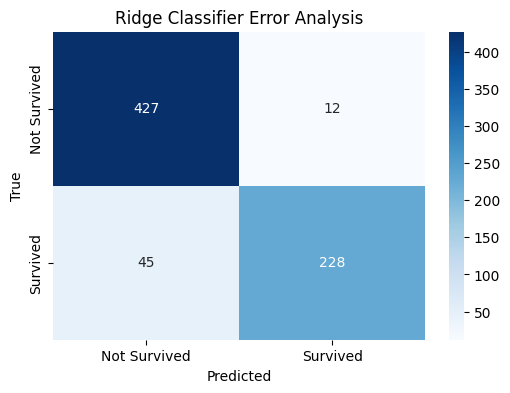

In [93]:
ypreds = cross_val_predict(RidgeClassifierCV(),x_train,y_train,cv=3)
cf = confusion_matrix(y_train,ypreds)
plt.figure(figsize=(6,4))
sns.heatmap(cf,annot=True,fmt='d' ,cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted');plt.ylabel('True');plt.title('Ridge Classifier Error Analysis')
plt.show()

In [94]:
print('Accuracy Score: ',accuracy_score(y_train,ypreds),end='\n\n')
print('Precision Score: ',precision_score(y_train,ypreds))
print('Recall Score: ',recall_score(y_train,ypreds))
print('F1 Score: ',f1_score(y_train,ypreds))
print('ROC AUC Score: ',roc_auc_score(y_train,ypreds))

Accuracy Score:  0.9199438202247191

Precision Score:  0.95
Recall Score:  0.8351648351648352
F1 Score:  0.888888888888889
ROC AUC Score:  0.9039149916143083


In [95]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [96]:
y_scores = cross_val_predict(RidgeClassifierCV(),x_train,y_train,method='decision_function',cv=3)

In [97]:
precisions,recalls,thresholds = precision_recall_curve(y_train,y_scores)

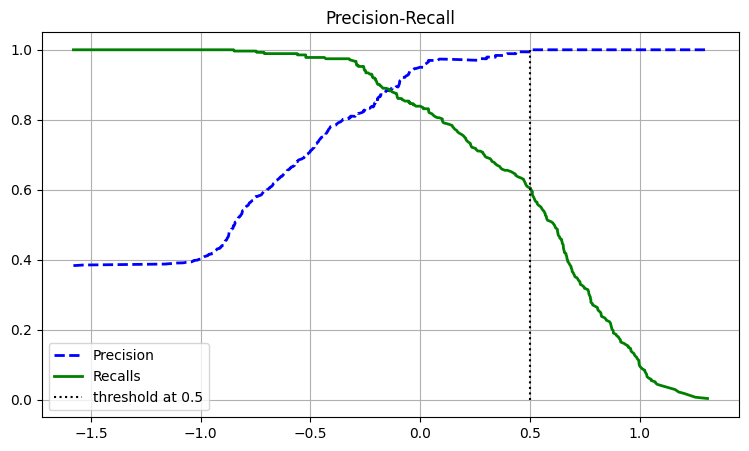

In [98]:
plt.figure(figsize=(9,5))
plt.plot(thresholds,precisions[:-1],'b--',label='Precision',linewidth=2)
plt.plot(thresholds,recalls[:-1],'g-',label='Recalls',linewidth=2)
plt.vlines(.5,0,1.0,'k','dotted',label='threshold at 0.5')
plt.title('Precision-Recall');plt.legend();plt.grid();plt.show()

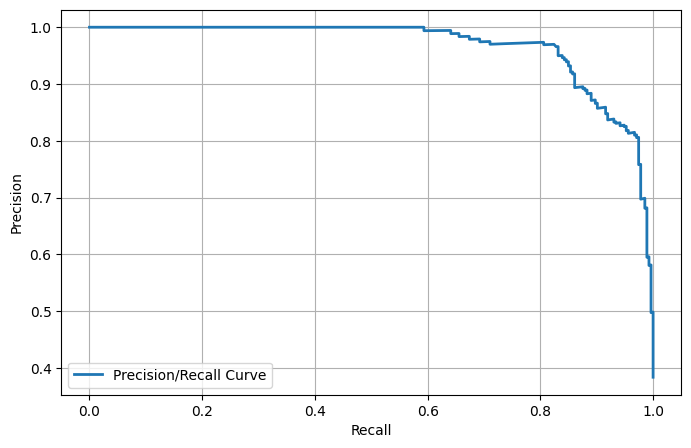

In [99]:
plt.figure(figsize=(8,5))
plt.plot(recalls,precisions,linewidth=2,label='Precision/Recall Curve')
plt.legend();plt.grid();plt.ylabel('Precision');plt.xlabel('Recall');
plt.show()

In [100]:
idx_for_90_precision = (precisions>=.90).argmax()
threshold_for_90_pr = thresholds[idx_for_90_precision]
y_prec_90 = (y_scores>=threshold_for_90_pr)
print('Precision Score: ',precision_score(y_train,y_prec_90))
print('Recall Score: ',recall_score(y_train,y_prec_90))

Precision Score:  0.9003831417624522
Recall Score:  0.8608058608058609


In [101]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

In [102]:
idx_for_threshold_90 = (thresholds<=threshold_for_90_pr).argmax()
tpr_90,fpr_90 = tpr[idx_for_threshold_90],fpr[idx_for_threshold_90]

In [103]:
y_scoresi = cross_val_predict(RandomForestClassifier(),x_train,y_train,method='predict_proba',cv=3)
y_scoresi

array([[0.  , 1.  ],
       [0.04, 0.96],
       [0.14, 0.86],
       ...,
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.14, 0.86]])

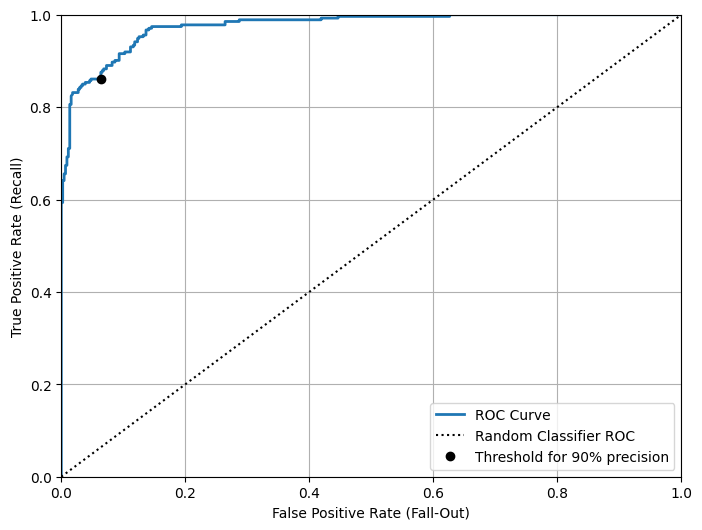

In [104]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,linewidth=2,label='ROC Curve')
plt.plot([0,1],[0,1],'k:',label='Random Classifier ROC')
plt.plot([fpr_90],[tpr_90],'ko',label='Threshold for 90% precision')
plt.ylabel('True Positive Rate (Recall)');plt.xlabel('False Positive Rate (Fall-Out)')
plt.legend();plt.grid();plt.axis([0, 1, 0, 1])
plt.show()

In [105]:
roc_auc_score(y_train,y_scores)

0.9758650612864737

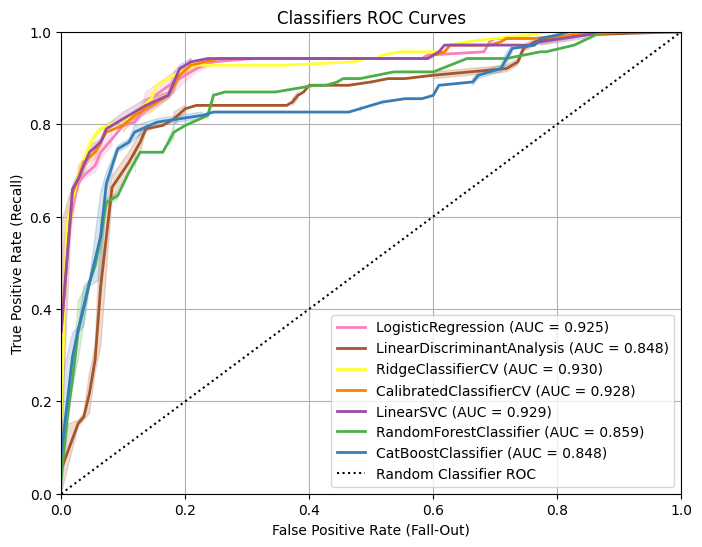

In [106]:
classifiers = [
    LogisticRegression(),
    LDA(),
    RidgeClassifierCV(),
    CalibratedClassifierCV(),
    LinearSVC(),
    RandomForestClassifier(),
    CatBoostClassifier(verbose=0),
    
   
]
colors = sns.color_palette("Set1_r", n_colors=len(classifiers))

plt.figure(figsize=(8,6))
i=0
for classifier in classifiers:
    model_name = type(classifier).__name__
    classifier.fit(x_train, y_train)

    if hasattr(classifier, "predict_proba"):
        probs = classifier.predict_proba(x_test)[:, 1]
    elif hasattr(classifier, "decision_function"):
        probs = classifier.decision_function(x_test)
    else:
        probs = classifier.predict(x_test)

    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)

    sns.lineplot(x=fpr, y=tpr, linewidth=2, label=f'{model_name} (AUC = {auc:.3f})',color=colors[i])
    i+=1

plt.plot([0, 1], [0, 1], 'k:', label='Random Classifier ROC')
plt.title('Classifiers ROC Curves')
plt.ylabel('True Positive Rate (Recall)');plt.xlabel('False Positive Rate (Fall-Out)')
plt.legend();plt.grid();plt.axis([0, 1, 0, 1])
plt.show()


as the roc curve far away from dotted line is better and higher `AUC Score`  (Area under curve)
After testing several models We notice that tree based model are not the best choice, 
and we can use `Voting` between number of best model to predict our final predictions

<a name='8'></a>
# 9- Voting Classifier

In [107]:
m1 = [LogisticRegression(random_state=33),CalibratedClassifierCV()]
votingcl = VotingClassifier(
    estimators=[(f'{k}',k)for k in m1],
    voting='soft',n_jobs=-1,
    verbose=1,
    weights=[5,2],
)
votingcl.fit(x_train,y_train)

[Voting]  (1 of 2) Processing LogisticRegression(random_state=33), total=   0.1s
[Voting] . (2 of 2) Processing CalibratedClassifierCV(), total=   0.3s


VotingClassifier(estimators=[('LogisticRegression(random_state=33)',
                              LogisticRegression(random_state=33)),
                             ('CalibratedClassifierCV()',
                              CalibratedClassifierCV())],
                 n_jobs=-1, verbose=1, voting='soft', weights=[5, 2])

In [108]:
tr_preds = votingcl.predict(x_train)
print('Train Accuracy',accuracy_score(y_train,tr_preds))
ts_preds = votingcl.predict(x_test)
print('Test Accuracy',accuracy_score(y_test,ts_preds))

Train Accuracy 0.8412921348314607
Test Accuracy 0.8659217877094972


In [109]:
ridge = RidgeClassifierCV(cv=5)
ridge.fit(x_train,y_train)
probstrain1 = ridge.decision_function(x_train)
probstest1 = ridge.decision_function(x_test)


linSVC = LinearSVC(random_state=3)
linSVC.fit(x_train,y_train)
probstrain2 = linSVC.decision_function(x_train)
probstest2 = linSVC.decision_function(x_test)

probstrain = (1.2*probstrain1+.8*probstrain2)/2
probstest = (1.2*probstest1+.8*probstest2)/2

In [110]:
tr_preds = (probstrain>0)
print('Train Accuracy',accuracy_score(y_train,tr_preds))
ts_preds = (probstest>0)
print('Test Accuracy',accuracy_score(y_test,ts_preds))

Train Accuracy 0.9157303370786517
Test Accuracy 0.88268156424581


Let's Try the two combined models on real submission..

In [111]:
predictions1 = ridge.decision_function(test_data_prepared)
predictions2 = linSVC.decision_function(test_data_prepared)
predictions = ((1.2*predictions1+.8*predictions2)/2>0).astype(int)


submission = pd.DataFrame({'PassengerId': passengersID, 'Survived': predictions})
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [112]:
!kaggle competitions submit -c titanic -f submission.csv -m "Combined Models (Voting Ridge and LSVC) with weights"

100%|██████████████████████████████████████| 2.77k/2.77k [00:01<00:00, 1.51kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [113]:
!kaggle competitions submissions -c titanic | head -n 4

fileName        date                 description                                                              status    publicScore  privateScore  
--------------  -------------------  -----------------------------------------------------------------------  --------  -----------  ------------  
submission.csv  2024-01-29 00:17:10  Combined Models (Voting Ridge and LSVC) with weights                     complete  0.79186                    


# **What A GOAL!**
The combined Ridge and LinearSVC models are performing well together, and they responded to the change in weights. 🎉

In [114]:
predictions = votingcl.predict(test_data_prepared)

submission = pd.DataFrame({'PassengerId': passengersID, 'Survived': predictions})
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [115]:
tr_preds = ((probstrain>0).astype(int)+votingcl.predict(x_train)>0).astype(int)
ts_preds = ((probstest>0).astype(int)+votingcl.predict(x_test)>0).astype(int)

print('Train Accuracy',accuracy_score(y_train,tr_preds))
print('Test Accuracy',accuracy_score(y_test,ts_preds))

Train Accuracy 0.8707865168539326
Test Accuracy 0.8715083798882681


In [116]:
predictions1 = ridge.decision_function(test_data_prepared)
predictions2 = linSVC.decision_function(test_data_prepared)
predictions3 = ((1.3*predictions1+.7*predictions2)/2>0).astype(int)

predictions= (predictions3+votingcl.predict(test_data_prepared)>1).astype(int)
submission = pd.DataFrame({'PassengerId': passengersID, 'Survived': predictions})
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<a name='9'></a>
# 10- Final Submission

In [117]:
!kaggle competitions submit -c titanic -f submission.csv -m "Combined Models (Voting LogisticR and Calibrated)+(Ridge and LinearSVC)"

100%|██████████████████████████████████████| 2.77k/2.77k [00:01<00:00, 2.02kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [118]:
!kaggle competitions submissions -c titanic | head -n 6

fileName        date                 description                                                              status    publicScore  privateScore  
--------------  -------------------  -----------------------------------------------------------------------  --------  -----------  ------------  
submission.csv  2024-01-29 00:17:18  Combined Models (Voting LogisticR and Calibrated)+(Ridge and LinearSVC)  complete  0.79665                    
submission.csv  2024-01-29 00:17:10  Combined Models (Voting Ridge and LSVC) with weights                     complete  0.79186                    
submission.csv  2024-01-29 00:16:36  Ridgecl                                                                  complete  0.78229                    


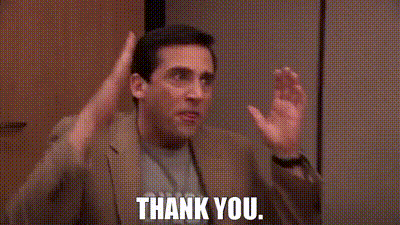

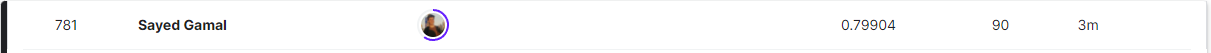

After completing `+90` submissions,I have reached top `5%` over all titanic competitorrs I dedicated myself to mastering and applying the machine learning cycle. The effort was substantial, but the results are rewarding. I appreciate your support on this journey. If you found it valuable, please consider an UPVOTE and share any useful analysis or machine learning techniques in the comments. Thank you! ❤️